In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the training data
training_data = pd.read_excel('data/training_set_rel3.xls')

# Load the validation data
validation_data = pd.read_excel('data/valid_set.xls')

training_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check the data structure
print("Data Structure:")
print(training_data.info())


Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12977 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2  

In [15]:

# Check the columns of the dataset
print("\nColumns:")
print(training_data.columns)



Columns:
Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')


In [17]:
# Check for missing or inconsistent entries
print("\nMissing or Inconsistent Entries:")
print(training_data.isnull().sum())



Missing or Inconsistent Entries:
essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64


Unique Groups:
[1 2 3 4 5 6 7 8]


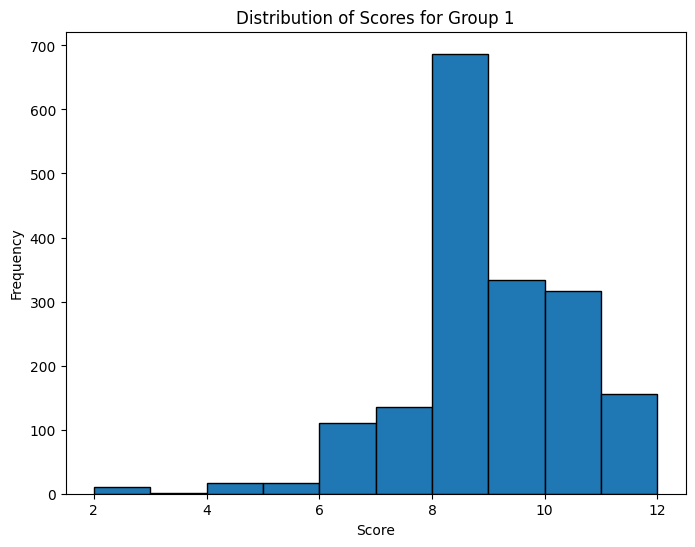


Statistics for Group 1:
Mean Score: 8.528323051037576
Median Score: 8.0
Minimum Score: 2.0
Maximum Score: 12.0
Standard Deviation: 1.5385651641273892


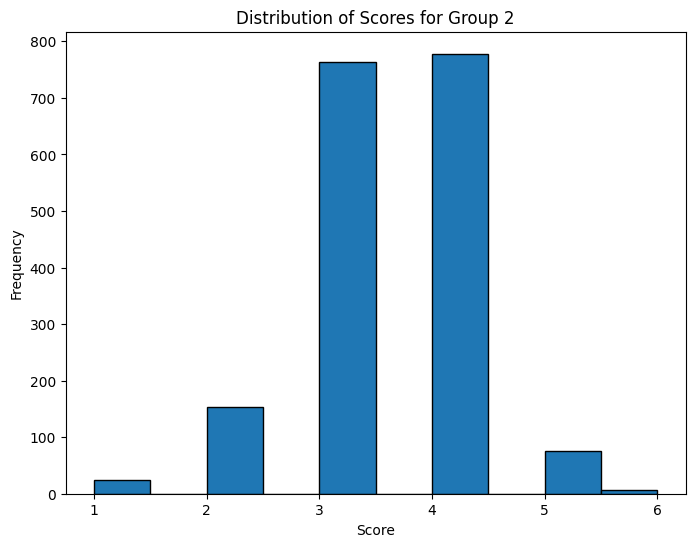


Statistics for Group 2:
Mean Score: 3.4155555555555557
Median Score: 3.0
Minimum Score: 1.0
Maximum Score: 6.0
Standard Deviation: 0.7745121451983221


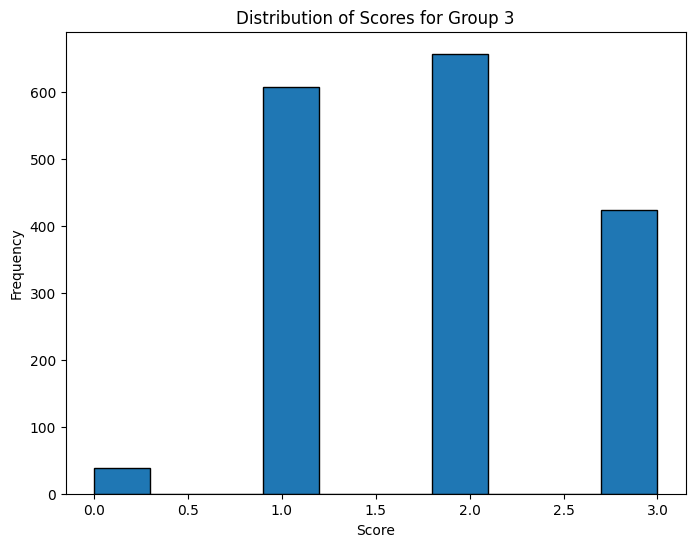


Statistics for Group 3:
Mean Score: 1.8482039397450754
Median Score: 2.0
Minimum Score: 0.0
Maximum Score: 3.0
Standard Deviation: 0.815156935975236


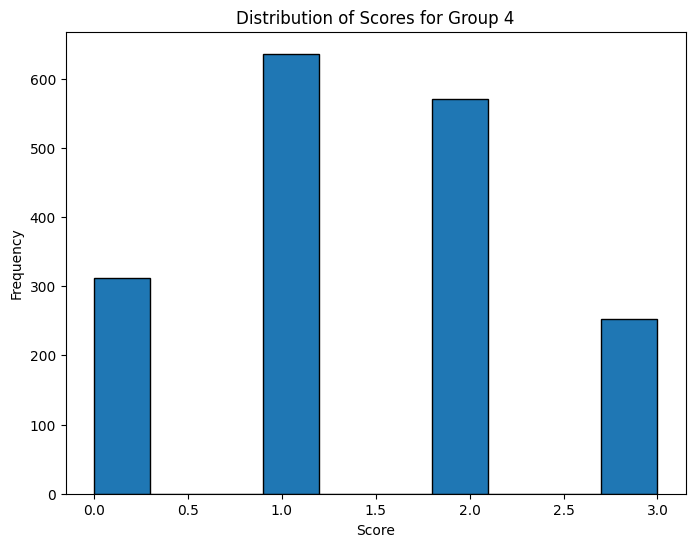


Statistics for Group 4:
Mean Score: 1.4313946922642575
Median Score: 1.0
Minimum Score: 0.0
Maximum Score: 3.0
Standard Deviation: 0.9401329558304301


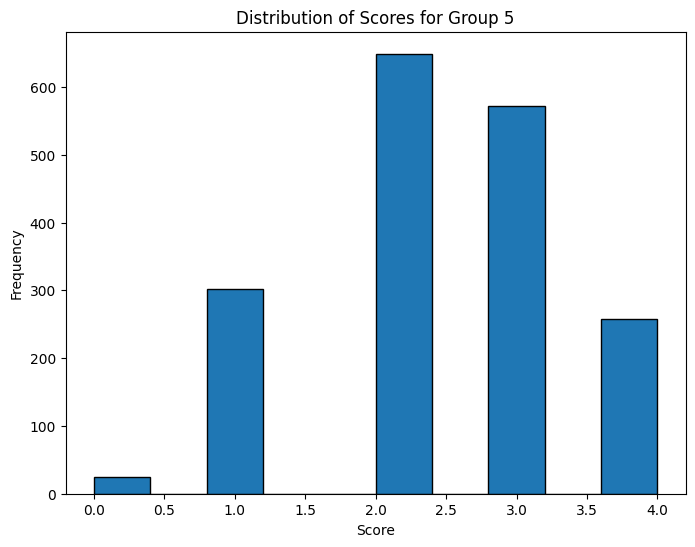


Statistics for Group 5:
Mean Score: 2.4088642659279778
Median Score: 2.0
Minimum Score: 0.0
Maximum Score: 4.0
Standard Deviation: 0.9708210150783203


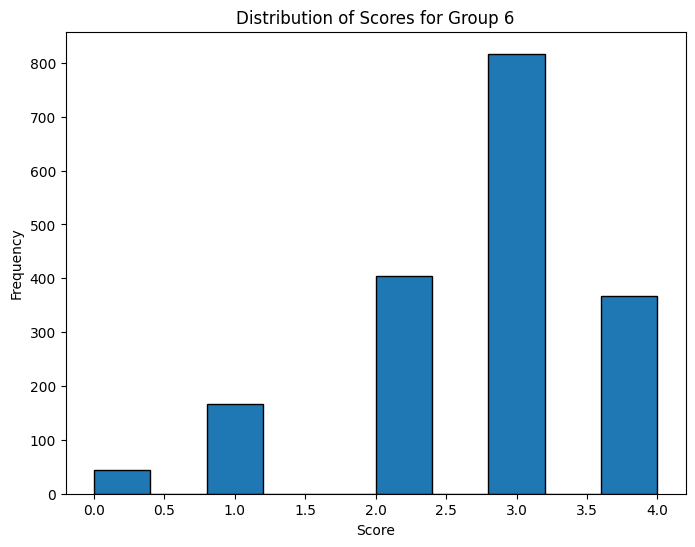


Statistics for Group 6:
Mean Score: 2.72
Median Score: 3.0
Minimum Score: 0.0
Maximum Score: 4.0
Standard Deviation: 0.9706304146738622


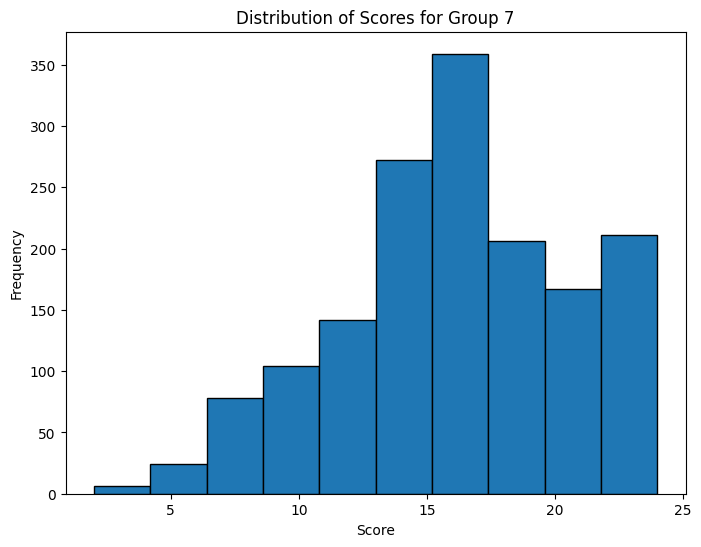


Statistics for Group 7:
Mean Score: 16.062460165710643
Median Score: 16.0
Minimum Score: 2.0
Maximum Score: 24.0
Standard Deviation: 4.585349820279463


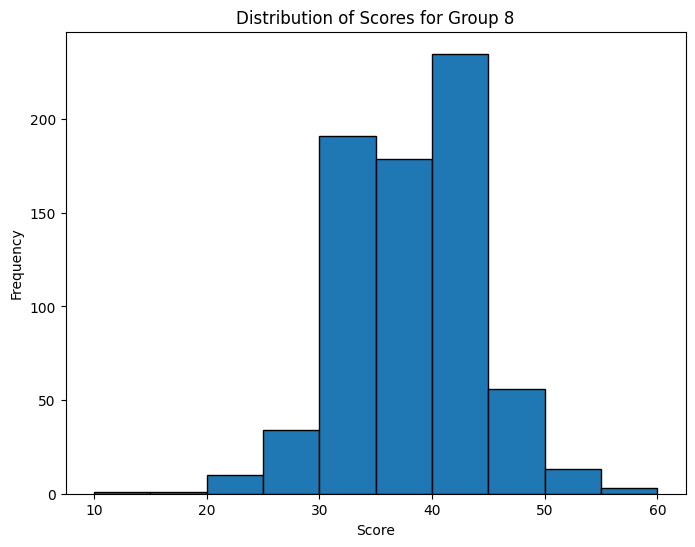


Statistics for Group 8:
Mean Score: 36.95020746887967
Median Score: 37.0
Minimum Score: 10.0
Maximum Score: 60.0
Standard Deviation: 5.753501579717453


In [19]:
# Get unique groups in the essay_set column
groups = training_data['essay_set'].unique()

# Print the unique groups
print("Unique Groups:")
print(groups)

# Analyze the distributions and statistics for each group
for group in groups:
    # Filter the data for the current group
    group_data = training_data[training_data['essay_set'] == group]
    
    # Plot the distribution of scores for the current group
    plt.figure(figsize=(8, 6))
    plt.hist(group_data['domain1_score'], bins=10, edgecolor='black')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Scores for Group {group}')
    plt.show()
    
    # Calculate and print important statistics for the current group
    print(f"\nStatistics for Group {group}:")
    print("Mean Score:", group_data['domain1_score'].mean())
    print("Median Score:", group_data['domain1_score'].median())
    print("Minimum Score:", group_data['domain1_score'].min())
    print("Maximum Score:", group_data['domain1_score'].max())
    print("Standard Deviation:", group_data['domain1_score'].std())


### Feature Engineering

In [3]:
from src.preprocess import initialize_nltk_resources, text_preprocessing_pipeline, analyze_essay_text

# Analyze the training data
feature_data = training_data['essay'].apply(analyze_essay_text)
features_df = pd.DataFrame(feature_data.tolist())

In [4]:
features_df.head()

,Number of characters,Number of words,Number of capital characters,Number of capital words,Number of sentences,Number of unique words,Number of stopwords,Number of punctuation,Average word length,Average sentence length,Unique words vs word count feature,Stopwords count vs words count feature
0,1875,386,55,8,16,181,176,55,3.984456,116.250000,0.468912,0.455959
1,2288,464,74,17,20,209,195,46,4.030172,113.450000,0.450431,0.420259
2,1541,313,55,11,14,161,143,34,4.035144,109.142857,0.514377,0.456869
3,3165,611,262,44,27,267,223,91,4.328969,116.259259,0.436989,0.364975
4,2569,517,54,5,30,211,241,55,4.071567,84.666667,0.408124,0.466151


In [5]:
# Display one of the full essays
essay_index = 1  # Change this index to display a different essay
essay = training_data.iloc[essay_index]['essay']
print(essay)

features_df.iloc[essay_index]

Dear @CAPS1 @CAPS2, I believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. Using computers can help us find coordibates, locations, and able ourselfs to millions of information. Also computers will benefit us by helping with jobs as in planning a house plan and typing a @NUM1 page report for one of our jobs in less than writing it. Now lets go into the wonder world of technology. Using a computer will help us in life by talking or making friends on line. Many people have myspace, facebooks, aim, these all benefit us by having conversations with one another. Many people believe computers are bad but how can you make friends if you can never talk to them? I am very fortunate for having a computer that can help with not only school work but my social life and how I make friends. Computers help us with finding our locations, coordibates and millions of information online. If we didn't go on the in

Number of characters                      2288.000000
Number of words                            464.000000
Number of capital characters                74.000000
Number of capital words                     17.000000
Number of sentences                         20.000000
Number of unique words                     209.000000
Number of stopwords                        195.000000
Number of punctuation                       46.000000
Average word length                          4.030172
Average sentence length                    113.450000
Unique words vs word count feature           0.450431
Stopwords count vs words count feature       0.420259
Name: 1, dtype: float64

In [7]:
from src.preprocess import count_text_punctuation, extract_tagged_entities

# Counts the occurrences of each punctuation mark in the essay
count_text_punctuation(essay)

{'@': 10, ',': 12, '.': 18, '?': 1, "'": 3, '-': 1, '!': 1}

In [8]:
# Extracts the tagged entities from the essay
tagged_entities = extract_tagged_entities(essay)
print(tagged_entities)

['CAPS1', 'CAPS2', 'NUM1', 'MONTH1', 'LOCATION1', 'LOCATION3', 'LOCATION2', 'NUM1', 'NUM3', 'NUM3']


#### Pre-processing 

For the given essay, below is the preprocessing pipeline used:

1. **Remove Special Tokens**  
   The essay contains tokens like `@CAPS1`, `@NUM1`, `@MONTH1`, `@LOCATION1`, etc., which are placeholders for proper nouns, numbers, months, and locations. We removed this special token.

2. **Lowercasing**  
  We convert all text to lowercase to maintain consistency.

3. **Punctuation and Special Characters**  
 Since we are dealing with  essay rating.We are going to keep the punctuation, It contributes to a comprehensive evaluation of the writer's abilities and the overall quality of the essay. 

4. **Tokenization**  
   We split the text into individual words or tokens.

5. **Remove Stop Words**  
   We remove the stop words (common words like 'the', 'is', 'at')  as they occur frequently and typically don't carry significant meaning.

6. **Stemming or Lemmatization**  
   Reduce words to their root form. Lemmatization considers the context and converts the word to its meaningful base form, whereas stemming simply removes suffixes.

7. **Handling Numbers**  
   Decide how to handle numbers – remove them, replace them with placeholders, or keep them based on their relevance.

8. **Whitespace Removal**  
   Eliminate extra whitespaces, line breaks, and tabs for consistency.


In [9]:
from src.preprocess import initialize_nltk_resources, text_preprocessing_pipeline

# Initialize NLTK resources
#initialize_nltk_resources()

# Apply the preprocessing pipeline to the training data and drop the original essay column
training_data['essay'] = training_data['essay'].apply(text_preprocessing_pipeline)

# Apply the preprocessing pipeline to the validation data and drop the original essay column
validation_data['essay'] = validation_data['essay'].apply(text_preprocessing_pipeline)

In [10]:
# Display the first 5 rows of the clean_essay column for the training data
print(training_data['essay'].head())

0    dear local newspaper think effect computer peo...
1    dear believe using computer benefit u many way...
2    dear people use computer everyone agrees benef...
3    dear local newspaper found many expert say com...
4    dear know computer positive effect people comp...
Name: essay, dtype: object


In [13]:
# Analyze the training data after preprocessing
feature_data = training_data['essay'].apply(analyze_essay_text)
features_df = pd.DataFrame(feature_data.tolist())
display(features_df.head())

,Number of characters,Number of words,Number of capital characters,Number of capital words,Number of sentences,Number of unique words,Number of stopwords,Number of punctuation,Average word length,Average sentence length,Unique words vs word count feature,Stopwords count vs words count feature
0,1047,158,0,0,1,104,1,0,5.632911,1047.0,0.658228,0.006329
1,1394,216,0,0,1,126,0,0,5.458333,1394.0,0.583333,0.000000
2,901,132,0,0,1,86,0,0,5.833333,901.0,0.651515,0.000000
3,1829,259,0,0,1,163,0,0,6.065637,1829.0,0.629344,0.000000
4,1492,221,0,0,1,123,0,0,5.755656,1492.0,0.556561,0.000000


rater1_domain1, rater2_domain1, rater3_domain1: These columns represent the scores given by different raters (rater1, rater2, rater3) for a specific domain (domain1). This domain could refer to a particular aspect of the essay, such as content quality, argument strength, etc.

In [25]:
# Replace NaN values with 0 before summing
training_data['calculated_sum'] = training_data[['rater1_domain1', 'rater2_domain1', 'rater3_domain1']].fillna(0).sum(axis=1)


# Compare the calculated sum with the actual domain1_score
#training_data['sum_matches'] = np.isclose(training_data['calculated_sum'], training_data['domain1_score'])

# OR, if domain1_score is expected to be an exact integer sum
training_data['sum_matches'] = training_data['calculated_sum'] == training_data['domain1_score']

# Use value_counts() to display the number of rows that match and don't match
print(training_data['sum_matches'].value_counts())

False    8529
True     4449
Name: sum_matches, dtype: int64


### Analysis of Results:

- **Matching Scores**: In some rows, the sum of the rater scores matches the `domain1_score`, which means that, for these cases, `domain1_score` can be considered as the summation of the individual rater scores.

- **Presence of NaN Values**: There are rows where rater score are missing (NaN). It's important to note that the calculation of the sum correctly handles these NaN values by inputting the NaN value to be 0. 

- **Discrepancies**: There are 8529 rows where `sum_matches` are `False` which suggests that there might be other factors or rules that contribute to the determination of `domain1_score` in certain cases. 


In [26]:
# Null values in the training data
print(training_data.isnull().sum())

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
calculated_sum        0
sum_matches           0
dtype: int64


## Correlation 

1. **High Correlation Between `essay_id` and `essay_set`**:

In [52]:
display(training_data.corr())

/var/folders/nq/zbsywqv94hq7dy3hw12t50yr0000gn/T/ipykernel_51248/1595407901.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(training_data.corr())


,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,calculated_sum,sum_matches
essay_id,1.000000,0.996694,0.470914,0.470062,0.062734,0.469718,0.005803,-0.008534,0.005803,0.696989,...,-0.001535,-0.020917,0.015969,-0.038396,-0.015715,-0.039681,0.103465,0.101558,0.447162,0.080466
essay_set,0.996694,1.000000,0.482252,0.481488,NaN,0.481103,NaN,NaN,NaN,0.737716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.458756,0.083392
rater1_domain1,0.470914,0.482252,1.000000,0.969328,0.732522,0.981789,0.696186,0.652462,0.696186,0.921229,...,0.565650,0.570751,0.743748,0.702981,0.682869,0.682903,0.695719,0.516019,0.931267,0.492228
rater2_domain1,0.470062,0.481488,0.969328,1.000000,0.653190,0.981166,0.637350,0.697151,0.637350,0.844190,...,0.895797,0.922200,0.535074,0.571704,0.476958,0.466155,0.599824,0.566449,0.934231,0.489008
rater3_domain1,0.062734,NaN,0.732522,0.653190,1.000000,1.000000,NaN,NaN,NaN,0.650591,...,0.574663,0.591355,0.832828,0.871336,0.742654,0.742330,0.877080,0.880368,0.966295,NaN
domain1_score,0.469718,0.481103,0.981789,0.981166,1.000000,1.000000,0.696186,0.652462,0.696186,0.898645,...,0.785316,0.813670,0.832828,0.871336,0.742654,0.742330,0.877080,0.880368,0.930723,0.581505
rater1_domain2,0.005803,NaN,0.696186,0.637350,NaN,0.696186,1.000000,0.801761,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700009,NaN
rater2_domain2,-0.008534,NaN,0.652462,0.697151,NaN,0.652462,0.801761,1.000000,0.801761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708494,NaN
domain2_score,0.005803,NaN,0.696186,0.637350,NaN,0.696186,1.000000,0.801761,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700009,NaN
rater1_trait1,0.696989,0.737716,0.921229,0.844190,0.650591,0.898645,NaN,NaN,NaN,1.000000,...,0.512357,0.479910,0.768042,0.675289,0.657641,0.629524,0.608913,0.378387,0.756894,-0.266860



   - The correlation coefficient of `0.996694` suggests that these two variables are closely related, indicating they might convey similar information or one is a function of the other.

2. **Strong Alignment in Rater Scores**:

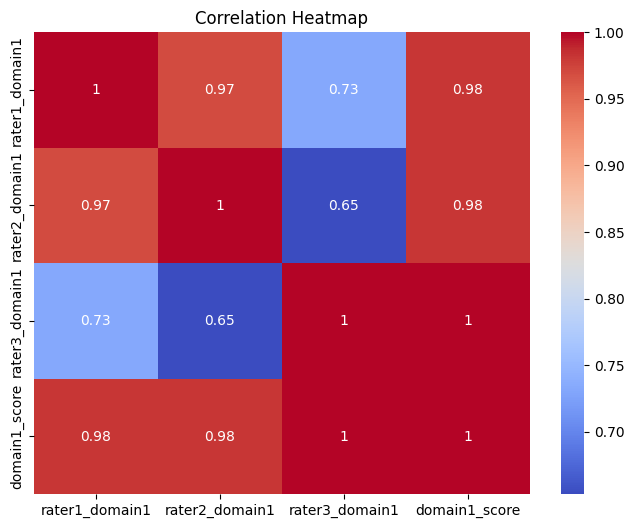

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_1 = training_data[['rater1_domain1', 'rater2_domain1', 'rater3_domain1', 'domain1_score']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


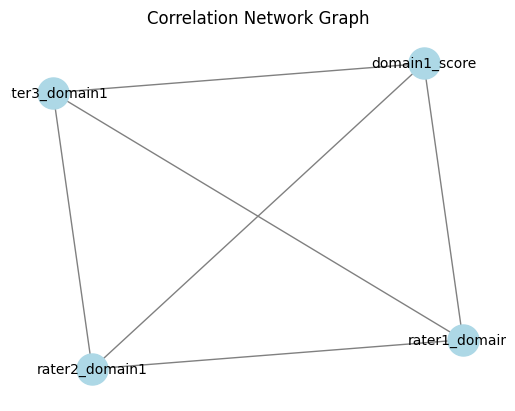

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(correlation_1.columns)

# Add edges to the graph
for i in range(len(correlation_1.columns)):
    for j in range(i+1, len(correlation_1.columns)):
        if abs(correlation_1.iloc[i, j]) > 0.5:  # Set a threshold for correlation strength
            G.add_edge(correlation_1.columns[i], correlation_1.columns[j])

# Draw the network graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set plot title and display the graph
plt.title('Correlation Network Graph')
plt.axis('off')
plt.show()


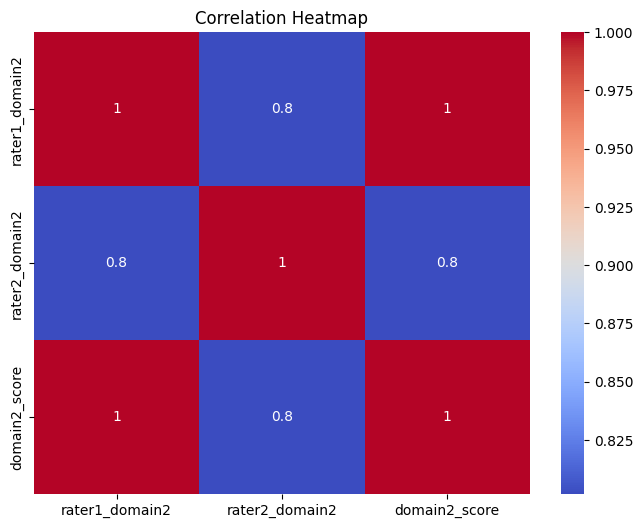

In [71]:
correlation_2 = training_data[['rater1_domain2', 'rater2_domain2', 'domain2_score']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



   - `rater1_domain1`, `rater2_domain1`, and `domain1_score` show high correlations with each other, indicating a strong alignment or consistency  in the way raters are scoring, or these scores contribute similarly to the overall domain1 score. High correlations here suggest consistency or agreement between raters.

   - The correlation coefficient between `rater1_domain2` and `rater2_domain2` of 0.801761 suggests a strong positive relationship between `rater1_domain2` and `rater2_domain2`. This indicates a high level of agreement or consistency in their ratings.

   - rater1_domain2 shows a perfect correlation coefficient of 1.000000 with domain2_score. This implies that the score assigned by rater1_domain2 is exactly the same as the domain2_score, suggesting that domain2_score might be directly derived from or equal to the rater1_domain2 score.


3. **Significant Correlations Among Traits and Rater Scores**:

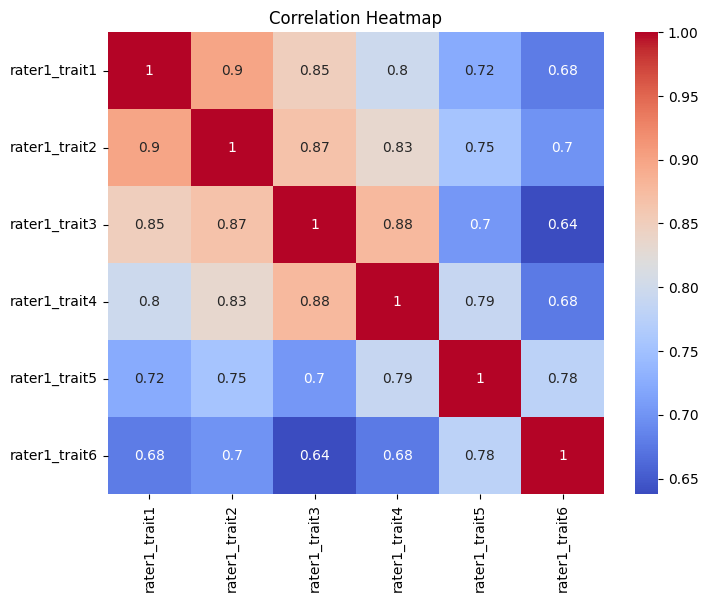

In [72]:
correlation_3 = training_data[['rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_3, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



- **Correlations Among `rater1` Traits**:
  - The correlation matrix shows the relationship between different traits as rated by `rater1`. High correlation coefficients suggest that these traits are often rated similarly.

- **`rater1_trait1` and Other Traits**:
  - `rater1_trait1` has a strong positive correlation with all other traits, particularly `rater1_trait2` (0.899426). This suggests that when `rater1_trait1` is rated high, other traits are also likely to be rated high, and vice versa.

- **`rater1_trait2`, `rater1_trait3`, and `rater1_trait4`**:
  - These traits show high correlations with each other, especially between `rater1_trait3` and `rater1_trait4` (0.877448). This implies a strong relationship in how these specific aspects of the essays are perceived by `rater1`.

- **`rater1_trait5` and `rater1_trait6`**:
  - The correlations of `rater1_trait5` and `rater1_trait6` with other traits are generally lower compared to the first four traits. However, they still show significant positive correlations, especially between themselves (0.778736).

- **Interpretation**:
  - These correlations suggest that there is a pattern in how `rater1` evaluates different aspects of the essays. Traits that are more correlated might represent similar dimensions of evaluation, while lower correlations could indicate more distinct aspects of rating.


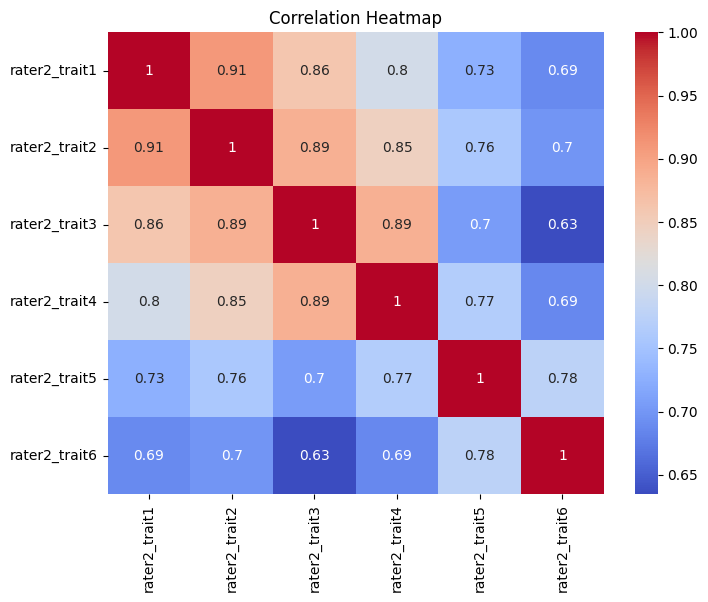

In [73]:
correlation_4 = training_data[['rater2_trait1', 'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_4, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



- **Correlations Among `rater2` Traits**:
  - The correlation matrix demonstrates the relationships between different traits as rated by `rater2`. High correlation coefficients suggest that these traits often receive similar ratings.

- **`rater2_trait1` and Other Traits**:
  - `rater2_trait1` is strongly correlated with all other traits, most notably with `rater2_trait2` (correlation: `0.909812`). This indicates that when `rater2_trait1` is rated high, the other traits are also likely to be rated high, and vice versa.

- **`rater2_trait2`, `rater2_trait3`, and `rater2_trait4`**:
  - These traits exhibit high correlations among each other, especially between `rater2_trait3` and `rater2_trait4` (correlation: `0.886614`). This implies a strong relationship in how these specific aspects of the essays are perceived by `rater2`.

- **`rater2_trait5` and `rater2_trait6`**:
  - The correlations of `rater2_trait5` and `rater2_trait6` with other traits are generally lower compared to the first four traits but still show significant positive correlations, notably between themselves (correlation: `0.776265`).

- **Interpretation**:
  - The correlation patterns suggest a consistent rating approach by `rater2` across different traits. Traits that are more correlated might represent similar dimensions of evaluation, while lower correlations could indicate more distinct aspects of rating.


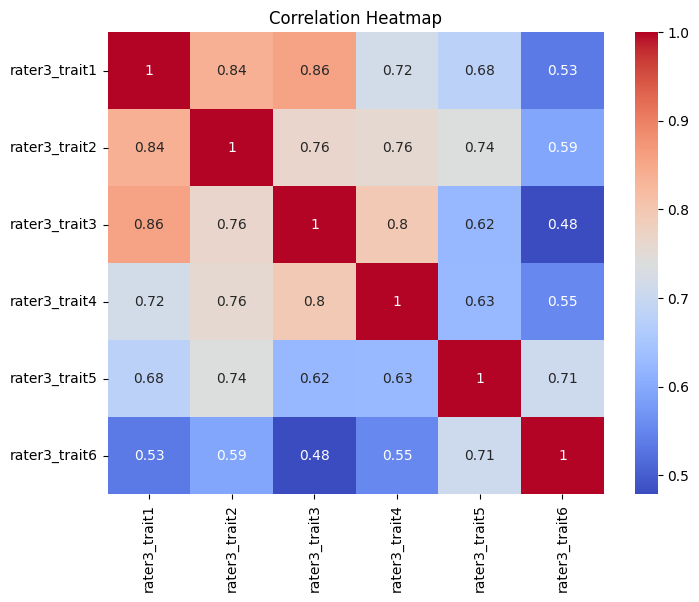

In [74]:
correlation_5 = training_data[['rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5', 'rater3_trait6']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_5, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


- **Correlations Among `rater3` Traits**:
  - The correlation matrix shows the relationships between different traits as rated by `rater3`. The high correlation coefficients indicate that these traits often receive similar ratings.

- **`rater3_trait1` and Other Traits**:
  - `rater3_trait1` shows strong positive correlations with all other traits, particularly high with `rater3_trait3` (correlation: `0.855713`). This suggests that high ratings in `rater3_trait1` tend to be associated with high ratings in other traits.

- **`rater3_trait2`, `rater3_trait3`, and `rater3_trait4`**:
  - These traits exhibit high correlations among each other, especially between `rater3_trait2` and `rater3_trait4` (correlation: `0.757024`). It implies a strong relationship in how these specific aspects of the essays are perceived by `rater3`.

- **`rater3_trait5` and `rater3_trait6`**:
  - While correlations of `rater3_trait5` and `rater3_trait6` with other traits are generally lower, they still show significant positive correlations. Notably, `rater3_trait6` is highly correlated with `rater3_trait5` (correlation: `0.710609`).

- **Interpretation**:
  - The correlation patterns suggest a consistent approach in `rater3`'s evaluation across different traits. Traits with higher correlations might represent similar dimensions of evaluation, whereas lower correlations could indicate more distinct aspects of rating.


###  Conclusion:

Many traits and rater scores are significantly correlated, which is expected in scenarios where multiple aspects of an essay are evaluated and influence each other.



4. **Presence of NaN Values**:
   - The NaN values, particularly for `rater3_domain1` and other `rater3` traits, might be due to missing data or lack of variability. This requires further investigation.

#### Handling the missing values 

In [30]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


### Method 1: A pipeline that remove all the missing values

In [36]:
def remove_missing_data(df):
    """
    Removes rows with any missing values in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to process.

    Returns:
    - pd.DataFrame: A DataFrame with rows containing NaN values removed.
    """
    # Drop rows with any NaN values
    cleaned_df = df.dropna()
    return cleaned_df
cleaned_data = remove_missing_data(training_data)
print("Original data shape:", training_data.shape)
print("Cleaned data shape:", cleaned_data.shape)

Original data shape: (12978, 30)
Cleaned data shape: (0, 30)


### Method 2: A pipeline input all the features by the mean

In [43]:
# Columns to impute
impute_columns = ['rater1_domain1', 'rater2_domain1', 'domain1_score', 
                  'rater1_domain2', 'rater2_domain2', 'domain2_score', 
                  'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 
                  'rater1_trait4', 'rater2_trait1', 'rater2_trait2', 
                  'rater2_trait3', 'rater2_trait4']

# Defining the imputer
imputer = SimpleImputer(strategy='median')  # or median, depending on your analysis

# Creating the pipeline
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('imputer', imputer, impute_columns)
    ],
    # dont drop the "essay" column
    remainder='passthrough' #drop 
)


In [44]:

processed_data = preprocessing_pipeline.fit_transform(training_data)
processed_data = pd.DataFrame(processed_data, columns=training_data.columns)
print(processed_data.shape)
print(training_data.shape)


(12978, 30)
(12978, 30)


In [46]:
processed_data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,calculated_sum,sum_matches
0,4.0,4.0,8.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,True
1,5.0,4.0,9.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,True
2,4.0,3.0,7.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,True
3,5.0,5.0,10.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,True
4,4.0,4.0,8.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,True


#### Method 3

In [47]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin


In [ ]:
def fit(self, X, y=None):
    return self

def transform(self, X):
    return X.drop(columns=self.columns_to_drop, errors='ignore')


# Columns for mode imputation
mode_impute_columns = ['column1', 'column2']  # Replace with your actual column names
mode_imputer = SimpleImputer(strategy='most_frequent')

# Columns for mean imputation
mean_impute_columns = ['column1', 'column2']  # Replace with your actual column names
mean_imputer = SimpleImputer(strategy='mean')

# Columns for median imputation
median_impute_columns = ['column3', 'column4']  # Replace with your actual column names
median_imputer = SimpleImputer(strategy='median')

# Columns to drop
columns_to_drop = ['column5', 'column6']  # Replace with your actual column names


In [ ]:
# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('mode_imputer', mode_imputer, mode_impute_columns),
        ('mean_imputer', mean_imputer, mean_impute_columns),
        ('median_imputer', median_imputer, median_impute_columns)
    ],
    remainder='passthrough'  # Keeps the remaining columns
)

# Define the complete pipeline
pipeline = Pipeline([
    ('impute', column_transformer),
    ('drop_columns', DropColumns(columns_to_drop))
])


In [ ]:

# Apply the pipeline
processed_data = pipeline.fit_transform(training_data)

# Retrieve the column names for the processed data
processed_columns = [col for col in data.columns if col not in columns_to_drop] + mean_impute_columns + median_impute_columns

# Convert back to DataFrame
processed_df = pd.DataFrame(processed_data, columns=processed_columns)
